<a href="https://www.kaggle.com/code/vainero/spambase-knn-lr-grid-search-ensemble?scriptVersionId=95087780" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

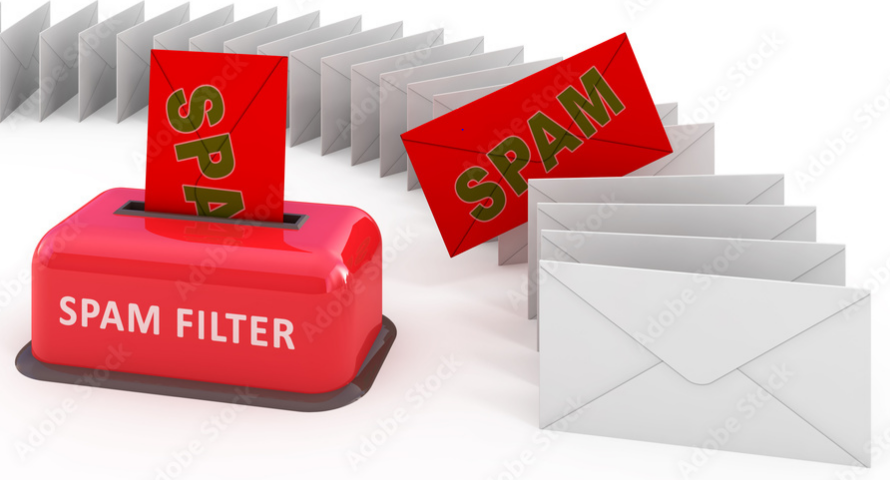

Credit Photo: https://stock.adobe.com/il/search?filters%5Bcontent_type%3Aphoto%5D=1&filters%5Bcontent_type%3Aillustration%5D=1&filters%5Bcontent_type%3Azip_vector%5D=1&filters%5Bcontent_type%3Avideo%5D=1&filters%5Bcontent_type%3Atemplate%5D=1&filters%5Bcontent_type%3A3d%5D=1&filters%5Bcontent_type%3Aimage%5D=1&k=spam&order=relevance&safe_search=1&limit=100&search_page=1&search_type=usertyped&acp=&aco=spam&get_facets=0&asset_id=33716100

### **Import Libraries**

In [1]:
import numpy as np 
import pandas as pd 


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, BaggingClassifier, \
    AdaBoostClassifier, GradientBoostingClassifier    
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

### **Load Data**

In [2]:
spam = pd.read_csv( "../input/spambase/spambase.csv", index_col = 0)

spam.head()

,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,,,,,,,,,,,,,,,,,,,,,
0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


The _spambase_ includes 57 features (columns) and 4601 e-mails (rows). Its features are characterized as follows:

* **word_freq_address** - percentage of words in the e-mail that match ADDRESS.
* **char_freq_#**  - percentage of characters in the e-mail that match #.
* **capital_run_length_average** - average lenth of uninterrupted sequences of capital letters.
* **capital_run_length_longest** - length of longest uninterrupted sequence of catipal letters.
* **capital_run_length_total** - total number of capital letters in the email

In [3]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4601 entries, 0.0 to 0.0
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_address           4601 non-null   float64
 1   word_freq_all               4601 non-null   float64
 2   word_freq_3d                4601 non-null   float64
 3   word_freq_our               4601 non-null   float64
 4   word_freq_over              4601 non-null   float64
 5   word_freq_remove            4601 non-null   float64
 6   word_freq_internet          4601 non-null   float64
 7   word_freq_order             4601 non-null   float64
 8   word_freq_mail              4601 non-null   float64
 9   word_freq_receive           4601 non-null   float64
 10  word_freq_will              4601 non-null   float64
 11  word_freq_people            4601 non-null   float64
 12  word_freq_report            4601 non-null   float64
 13  word_freq_addresses         46

In [4]:
# Split dataset into training set (70%) and test set (30%)
spam_train, spam_test = split(spam, train_size=0.7, random_state=1313) 
spam_train.head()

,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,1.02,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,...,0.000,0.550,0.000,0.00,0.000,0.000,1.333,5,28,0
0.0,0.0,0.23,0.0,0.46,0.00,0.0,0.0,0.23,0.00,0.0,...,0.000,0.113,0.000,0.09,0.000,0.203,2.430,121,666,0
0.0,0.0,0.36,0.0,0.36,0.00,0.0,0.0,0.00,0.00,0.0,...,0.279,0.767,0.139,0.00,0.000,0.000,3.722,20,268,0
0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,...,0.000,0.000,0.000,0.00,0.000,0.000,1.250,2,5,0
0.0,0.0,0.56,0.0,0.08,0.16,0.0,0.0,0.00,0.16,0.0,...,0.164,0.505,0.000,0.01,0.021,0.000,2.729,55,1122,0


In [5]:
# Create target
X = spam_train.drop(['spam'], axis=1)
y = spam_train['spam']

X_test = spam_test.drop(['spam'], axis=1)
y_test = spam_test['spam']

### **K-Nearest Neighbor(KNN) Classification**

### Default metric (Euclidean)

In [6]:
# Create KNN Classifier model for k = 5
spam_clf = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
spam_clf.fit(X, y)

print(spam_clf.score(X, y))

0.8680124223602484


### Assessment

In [7]:
# Predict the response for train dataset
train_pred_1 = spam_clf.predict(X)

# Confusion matrix
cm = confusion_matrix(y_true=y, y_pred=train_pred_1)

print(pd.DataFrame(cm, index=['Not-spam', 'Spam'], 
                   columns=['Not-spam', 'Spam']))

print(classification_report(y_true=y, y_pred=train_pred_1))


          Not-spam  Spam
Not-spam      1763   194
Spam           231  1032
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1957
           1       0.84      0.82      0.83      1263

    accuracy                           0.87      3220
   macro avg       0.86      0.86      0.86      3220
weighted avg       0.87      0.87      0.87      3220



### Validation

In [8]:
# Predict the response for test set
test_pred_1 = spam_clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=test_pred_1)

print(pd.DataFrame(cm, index=['Not-spam', 'Spam'], 
                   columns=['Not-spam', 'Spam']))

print(classification_report(y_true=y_test, y_pred=test_pred_1))

          Not-spam  Spam
Not-spam       719   112
Spam           167   383
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       831
           1       0.77      0.70      0.73       550

    accuracy                           0.80      1381
   macro avg       0.79      0.78      0.79      1381
weighted avg       0.80      0.80      0.80      1381



### Cosine distance

In [9]:
# Create KNN Classifier model for k = 5, metric = 'cosine', and 'brute' algorithm
spam_clf = KNeighborsClassifier(n_neighbors=5, 
                                metric='cosine', 
                                algorithm='brute')

# Fit the model using the training set
spam_clf.fit(X, y)

print(spam_clf.score(X, y))


0.8881987577639752


### Assessment

In [10]:
# Predict the response for train dataset
train_pred_2 = spam_clf.predict(X)

# Confusion matrix
cm = confusion_matrix(y_true=y, y_pred=train_pred_2)

print(pd.DataFrame(cm, index=['Not-spam', 'Spam'], 
                   columns=['Not-spam', 'Spam']))

print(classification_report(y_true=y, y_pred=train_pred_2))

          Not-spam  Spam
Not-spam      1719   238
Spam           122  1141
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1957
           1       0.83      0.90      0.86      1263

    accuracy                           0.89      3220
   macro avg       0.88      0.89      0.88      3220
weighted avg       0.89      0.89      0.89      3220



### Validation

In [11]:
# Predict the response for test set
test_pred_2 = spam_clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=test_pred_2)

print(pd.DataFrame(cm, index=['Not-spam', 'Spam'], 
                   columns=['Not-spam', 'Spam'])) 

print(classification_report(y_true=y_test, y_pred=test_pred_2))

          Not-spam  Spam
Not-spam       694   137
Spam            82   468
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       831
           1       0.77      0.85      0.81       550

    accuracy                           0.84      1381
   macro avg       0.83      0.84      0.84      1381
weighted avg       0.85      0.84      0.84      1381



### **Logistic Regression**

In [12]:
# Create Logistic Regression Classifier model
spam_clf = LogisticRegression(solver='liblinear', max_iter=10000)

# Fit the model using the training set
spam_clf.fit(X, y)

print(spam_clf.score(X, y))

0.9301242236024845


The score may vary we sample different train sets.

So, a better predictor for the test score will be to simply fit the model several times, and this is done with the cross-validation mechanism.

In [13]:
k = 5
scores = cross_val_score(spam_clf, X, y, cv=k)

print("Scores: " + (k * '{:.3f} ').format(*scores))
print('Average:', scores.mean())

Scores: 0.919 0.932 0.918 0.925 0.930 
Average: 0.9248447204968944


The variance of the test score is relatively large. However, the mean of these errors is a better estimator for the real model error.

In [14]:
print(spam_clf.fit(X, y).score(X_test, y_test))

0.9167270094134685


**NOTE:** No need for _fit()_ application when using _cross_val_score()_

### **Grid search**

We can explore the hyperparameters of any model by calling the _get_params()_ method.

In [15]:
spam_clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Now we can apply the grid_search. Complying with the standard Scikit-learn API, Grid-SearchCV objects support the _fit()_ and _predict()_ methods. 

The prediction is using the estimator with the best-found parameters, which is also available in the _best_estimator_ attribute.

In [16]:
# Create Grid Search CV model
clf_gs = GridSearchCV(spam_clf, param_grid={'C': [0.01, 0.1, 1, 10, 100], 
                                           'fit_intercept': [True, False]},
                                           cv=2)
# Fit the model using the training set
clf_gs.fit(X, y)

print('Best model:', clf_gs.best_estimator_)
print('Best parameters:', clf_gs.best_params_)
print('Best score:', clf_gs.best_score_)

Best model: LogisticRegression(C=1, max_iter=10000, solver='liblinear')
Best parameters: {'C': 1, 'fit_intercept': True}
Best score: 0.9236024844720497


**NOTE:** The bestscore attribute is not the same as the train score (given by _clf_gs.score(X, y)_), because of the cross-validation.

In [17]:
print(clf_gs.score(X_test, y_test))

0.9167270094134685


### **Ensemble methods**

*  Avergaring methods:
    *    Voting
    *    Bagging
        
*  Boosting methods:
    *    AdaBoost
    *    Gradient boosting

### Voting

Voting is the most intuitive ensemble method, as it considers the results of different estimators in a straight-forward manner.

In [18]:
# Let's 3 different classifiers: Logistic Regression, Decision Tree, Support Vector Machine
clf1 = LogisticRegression(solver='liblinear')
clf2 = DecisionTreeClassifier(max_depth=5)
clf3 = SVC()

classifiers = [('LR', clf1), ('DT', clf2), ('SVM', clf3)]

results = y.to_frame()
for clf_name, clf in classifiers:
    clf.fit(X, y)
    results[clf_name] = clf.predict(X)
    print('{:3} classifier:\n \
        \ttrain accuracy: {:.2f}\n \
        \ttest accuracy: {:.2f}'\
         .format(clf_name,
                 clf.score(X, y),
                 clf.score(X_test, y_test)))

LR  classifier:
         	train accuracy: 0.93
         	test accuracy: 0.92
DT  classifier:
         	train accuracy: 0.93
         	test accuracy: 0.90
SVM classifier:
         	train accuracy: 0.71
         	test accuracy: 0.71


**NOTE:** The method _to_frame()_ converts a Series to a DataFrame. I used it for making the results DataFrame which will gather our various predictions.

In [19]:
results.head(15)

,spam,LR,DT,SVM
word_freq_make,,,,
0.00,0,0,0,0
0.00,0,0,0,1
0.00,0,0,0,0
0.00,0,0,0,0
0.00,0,0,0,1
0.00,1,1,1,0
0.00,0,0,0,0
0.00,0,0,0,0
0.53,1,1,1,1


In [20]:
# Create Voting Classifier model
clf_voting = VotingClassifier(estimators=classifiers, voting='hard')
clf_voting.fit(X, y)

print('{:3} classifier:\n \
        \ttrain accuracy: {:.2f}\n \
        \ttest accuracy: {:.2f}'\
         .format('Voting',
                 clf_voting.score(X, y),
                 clf_voting.score(X_test, y_test)))

Voting classifier:
         	train accuracy: 0.93
         	test accuracy: 0.90


In [21]:
results['Voting'] = clf_voting.predict(X)
results.head(15)

,spam,LR,DT,SVM,Voting
word_freq_make,,,,,
0.00,0,0,0,0,0
0.00,0,0,0,1,0
0.00,0,0,0,0,0
0.00,0,0,0,0,0
0.00,0,0,0,1,0
0.00,1,1,1,0,1
0.00,0,0,0,0,0
0.00,0,0,0,0,0
0.53,1,1,1,1,1


### Bagging (Bootstrap Aggregation)

Bagging like voting, with the only detail that instead of different models you choose a specific type of model (called **base model**), and then fit subsamples of your data to it many times.

In Scikit-learn this meta-classifier is implemented by the BuggingClassifier class, and its main arguments are of course _base_estimator_ and *n_estimators*.

#### Decision tree as a base model

In [22]:
# Create Decision Tree Classifier as a base model
clf_base = DecisionTreeClassifier(max_depth=5)

# Create Bagging Classifier model
clf_bagging = BaggingClassifier(base_estimator=clf_base, n_estimators=200)

# Fit the model using the training set
clf_bagging.fit(X, y)

print('{:3} classifier:\n \
    \ttrain accuracy: {:.2f}\n \
    \ttest accuracy: {:.2f}'\
     .format('DT bagging',
             clf_bagging.score(X, y),
             clf_bagging.score(X_test, y_test)))

DT bagging classifier:
     	train accuracy: 0.95
     	test accuracy: 0.92


In [23]:
results['Bagging DTs'] = clf_bagging.predict(X)
results.head(15)

,spam,LR,DT,SVM,Voting,Bagging DTs
word_freq_make,,,,,,
0.00,0,0,0,0,0,0
0.00,0,0,0,1,0,0
0.00,0,0,0,0,0,0
0.00,0,0,0,0,0,0
0.00,0,0,0,1,0,0
0.00,1,1,1,0,1,1
0.00,0,0,0,0,0,0
0.00,0,0,0,0,0,0
0.53,1,1,1,1,1,1


#### Logistic Regression as a base model

In [24]:
# Create Logistic Regression as a base model
clf_base = LogisticRegression(solver='liblinear', max_iter=10000)

# Create Bagging Classifier model
clf_bagging = BaggingClassifier(base_estimator=clf_base,
                                n_estimators=200)

# Fit the model using the training set
clf_bagging.fit(X, y)

print('{:3} classifier:\n \
    \ttrain accuracy: {:.2f}\n \
    \ttest accuracy: {:.2f}'\
     .format('LR bagging',
             clf_bagging.score(X, y),
             clf_bagging.score(X_test, y_test)))

LR bagging classifier:
     	train accuracy: 0.93
     	test accuracy: 0.93


In [25]:
results['Bagging LRs'] = clf_bagging.predict(X)
results.head(15)

,spam,LR,DT,SVM,Voting,Bagging DTs,Bagging LRs
word_freq_make,,,,,,,
0.00,0,0,0,0,0,0,0
0.00,0,0,0,1,0,0,0
0.00,0,0,0,0,0,0,0
0.00,0,0,0,0,0,0,0
0.00,0,0,0,1,0,0,0
0.00,1,1,1,0,1,1,1
0.00,0,0,0,0,0,0,0
0.00,0,0,0,0,0,0,0
0.53,1,1,1,1,1,1,1


### AdaBoost

In Scikit-learn AdaBoost is implemented by the AdaBoost class, and its main arguments are the *base_estimator*,
the maximum number of iterations *n_estimators*, and the *learning_rate* the allowed influence of former classifiers on the boosting process. 

AdaBoost is relatively sensitive to noisy data and outliers.

In [26]:
# Create Decision Tree Classifier
clf_base = DecisionTreeClassifier(max_depth=3)

# Create AdaBoost Classifier method
clf_adaboost = AdaBoostClassifier(base_estimator=clf_base,
                                  n_estimators=200,
                                  learning_rate=0.05)

# Fit the model using the training set
clf_adaboost.fit(X, y)

print('{:3} classifier:\n \
    \ttrain accuracy: {:.2f}\n \
    \ttest accuracy: {:.2f}'\
     .format('DT ADA boosting',
             clf_adaboost.score(X, y),
             clf_adaboost.score(X_test, y_test)))

DT ADA boosting classifier:
     	train accuracy: 0.99
     	test accuracy: 0.94


### Gradient boosting

In [27]:
# Create Gradient Boosting Classifier
clf_GB = GradientBoostingClassifier(max_depth=3,
                                    n_estimators=200,
                                    learning_rate=0.05)

# Fit the model using the training set
clf_GB.fit(X, y)

print('{:3} classifier:\n \
    \ttrain accuracy: {:.2f}\n \
    \ttest accuracy: {:.2f}'\
     .format('DT gradient boosting',
             clf_GB.score(X, y),
             clf_GB.score(X_test, y_test)))

DT gradient boosting classifier:
     	train accuracy: 0.97
     	test accuracy: 0.94


**NOTE:** Gradient boosting is also implemented by the commonly used **XGBoost** package.

### **👍 If you find this notebook useful, please support with an upvote 👍**